# Groceries dataset

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_excel('du lieu cung cap/ItemList.xlsx', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
records = []  
for i in range(0, df.shape[0]):  
    records.append([str(df.values[i,j]) for j in range(0, df.shape[1])])

In [6]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(14963, 168)

In [7]:
df.isnull().any().any()

False

In [8]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df = df.drop(['nan'], axis=1)
df.shape

(14963, 167)

In [10]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets.head()

(750, 2)


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


### 1. Áp dụng thuật toán (tự lựa chọn các tham số phù hợp cho thuật toán, lưu ý với số lượng transaction càng nhiều thì các ngưỡng càngnhỏ, gợi ý:min_support= 0.001). In kết quả.Vẽ biểu đồ.

In [11]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.001)
print(rules.shape)
rules.head()

(1238, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009


In [12]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

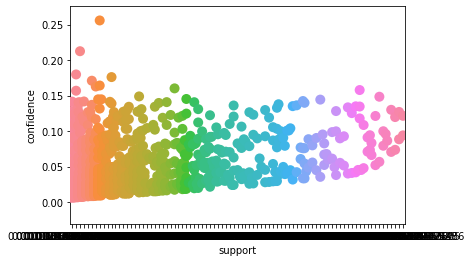

In [13]:
sns.swarmplot(x = support, y= confidence, size=10)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

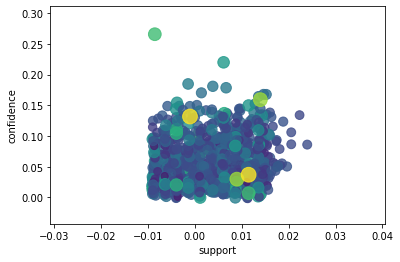

In [14]:
import random
import matplotlib.pyplot as plt

for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)   

plt.scatter(support, confidence, s= lift*100,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### 2. Tìm kiếm thông tin từ kết quả: trong thông tin kết quả có 'sausage' không? Nếu có thì 'sausage' kết hợp với item nào?

In [15]:
# "Có eggs không? nó kết hợp với item nào?"
include_sausage = []
for row in rules.iterrows():   
    if 'sausage' in row[1][0]:
        include_sausage.append(row)

In [16]:
products = [item[1][1] for item in include_sausage]
products

[frozenset({'UHT-milk'}),
 frozenset({'beverages'}),
 frozenset({'bottled beer'}),
 frozenset({'bottled water'}),
 frozenset({'brown bread'}),
 frozenset({'butter'}),
 frozenset({'canned beer'}),
 frozenset({'chicken'}),
 frozenset({'chocolate'}),
 frozenset({'citrus fruit'}),
 frozenset({'coffee'}),
 frozenset({'cream cheese'}),
 frozenset({'curd'}),
 frozenset({'dessert'}),
 frozenset({'domestic eggs'}),
 frozenset({'frankfurter'}),
 frozenset({'frozen meals'}),
 frozenset({'frozen vegetables'}),
 frozenset({'fruit/vegetable juice'}),
 frozenset({'grapes'}),
 frozenset({'long life bakery product'}),
 frozenset({'margarine'}),
 frozenset({'misc. beverages'}),
 frozenset({'newspapers'}),
 frozenset({'other vegetables'}),
 frozenset({'pastry'}),
 frozenset({'pip fruit'}),
 frozenset({'pork'}),
 frozenset({'rolls/buns'}),
 frozenset({'root vegetables'}),
 frozenset({'salty snack'}),
 frozenset({'shopping bags'}),
 frozenset({'sliced cheese'}),
 frozenset({'soda'}),
 frozenset({'tropical 

### 3, 4. Cho biết sản phẩm được mua nhiều hoặc ít nhất. Vẽ biểu đồ

In [17]:
result = df.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,...,80,51,277,654,8,359,175,2363,1285,60


In [18]:
df_true = result.iloc[1,:]
best_seller = df_true.sort_values(ascending=False)

#### 15 sản phẩm được mua nhiều nhất

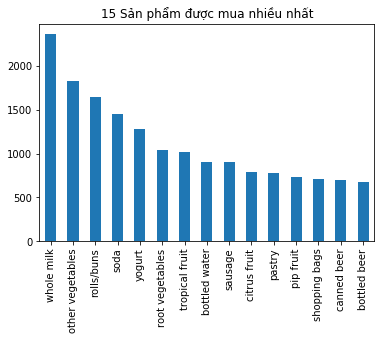

In [19]:
best_seller[:15].plot(kind='bar', title='15 Sản phẩm được mua nhiều nhất')

#### 15 sản phẩm được mua ít nhất

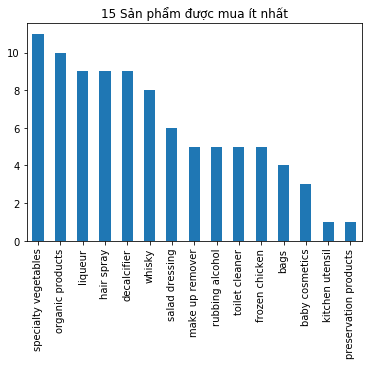

In [20]:
best_seller[-15:].plot(kind='bar', title='15 Sản phẩm được mua ít nhất')